## Running ordinations on Hellinger-transformed data for each soil type

In [1]:
library(phyloseq)
library(wesanderson)
library(ggplot2)
library(vegan)
library(dplyr)

Loading required package: permute
Loading required package: lattice
This is vegan 2.5-6

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
ps.hell=readRDS("../data/Cornell16S/ps.16S.hell")
ps.hell

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 14870 taxa and 174 samples ]
sample_data() Sample Data:       [ 174 samples by 69 sample variables ]
tax_table()   Taxonomy Table:    [ 14870 taxa by 7 taxonomic ranks ]

In [3]:
# Full dataset analysis

ord = ordinate(ps.hell, "NMDS", "bray", k=2, trymax=500)
ord
df = as(sample_data(ps.hell), "data.frame")
d = phyloseq::distance(ps.hell, method = "bray")

Run 0 stress 0.1165289 
Run 1 stress 0.1137071 
... New best solution
... Procrustes: rmse 0.01670672  max resid 0.1788241 
Run 2 stress 0.1475053 
Run 3 stress 0.1262046 
Run 4 stress 0.1507186 
Run 5 stress 0.1454691 
Run 6 stress 0.1387222 
Run 7 stress 0.1341604 
Run 8 stress 0.1362151 
Run 9 stress 0.1032805 
... New best solution
... Procrustes: rmse 0.009935778  max resid 0.1259605 
Run 10 stress 0.155438 
Run 11 stress 0.1395652 
Run 12 stress 0.1293009 
Run 13 stress 0.1146998 
Run 14 stress 0.1355093 
Run 15 stress 0.1421464 
Run 16 stress 0.1149647 
Run 17 stress 0.1251192 
Run 18 stress 0.1569424 
Run 19 stress 0.1495749 
Run 20 stress 0.1494125 
Run 21 stress 0.1511022 
Run 22 stress 0.1221474 
Run 23 stress 0.1423707 
Run 24 stress 0.149793 
Run 25 stress 0.130354 
Run 26 stress 0.103219 
... New best solution
... Procrustes: rmse 0.001473614  max resid 0.01785669 
Run 27 stress 0.1580864 
Run 28 stress 0.140323 
Run 29 stress 0.1234143 
Run 30 stress 0.1302745 
Run 31 st


Call:
metaMDS(comm = veganifyOTU(physeq), distance = distance, k = 2,      trymax = 500) 

global Multidimensional Scaling using monoMDS

Data:     veganifyOTU(physeq) 
Distance: bray 

Dimensions: 2 
Stress:     0.103219 
Stress type 1, weak ties
Two convergent solutions found after 41 tries
Scaling: centring, PC rotation, halfchange scaling 
Species: expanded scores based on ‘veganifyOTU(physeq)’ 


In [4]:
d.adonis = adonis(d~sample_data(ps.hell)$Soil_Trtmt+sample_data(ps.hell)$Amdmt+sample_data(ps.hell)$Day+
                  sample_data(ps.hell)$Soil_Trtmt*sample_data(ps.hell)$Amdmt+
                  sample_data(ps.hell)$Soil_Trtmt*sample_data(ps.hell)$Day,
                  df)
d.adonis


Call:
adonis(formula = d ~ sample_data(ps.hell)$Soil_Trtmt + sample_data(ps.hell)$Amdmt +      sample_data(ps.hell)$Day + sample_data(ps.hell)$Soil_Trtmt *      sample_data(ps.hell)$Amdmt + sample_data(ps.hell)$Soil_Trtmt *      sample_data(ps.hell)$Day, data = df) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                                                            Df SumsOfSqs
sample_data(ps.hell)$Soil_Trtmt                              4    35.255
sample_data(ps.hell)$Amdmt                                   2     1.732
sample_data(ps.hell)$Day                                     2     1.433
sample_data(ps.hell)$Soil_Trtmt:sample_data(ps.hell)$Amdmt   8     4.223
sample_data(ps.hell)$Soil_Trtmt:sample_data(ps.hell)$Day     8     3.411
Residuals                                                  149    19.207
Total                                                      173    65.260
                                                          

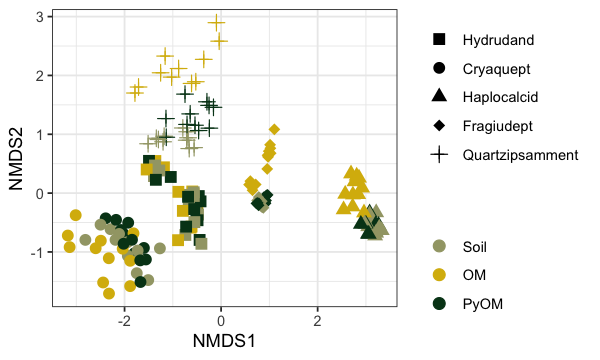

In [26]:
options(repr.plot.width = 5, repr.plot.height = 3)

p = plot_ordination(ps.hell, ord, axes=c(1,2), type="samples", color="Amdmt",shape="Soil_Name")
#palette = c(wes_palette("Darjeeling1"))[c(2,1,4,3,5)]
palette = c(wes_palette("Cavalcanti1"))[c(3,1,2)]
p = p + theme_bw()
p = p + scale_color_manual(values=palette)
p = p + scale_shape_manual(values=c(15,16,17,18,3))
p = p + geom_point(size=3)
p = p + guides(shape = guide_legend(title=""), color=guide_legend(title=""))
p

Run 0 stress 0.08411101 
Run 1 stress 0.08411101 
... New best solution
... Procrustes: rmse 1.021965e-06  max resid 2.724719e-06 
... Similar to previous best
Run 2 stress 0.08411101 
... Procrustes: rmse 2.000316e-06  max resid 3.897531e-06 
... Similar to previous best
Run 3 stress 0.08411101 
... New best solution
... Procrustes: rmse 7.04648e-07  max resid 1.788717e-06 
... Similar to previous best
Run 4 stress 0.08411101 
... Procrustes: rmse 1.443085e-06  max resid 2.771246e-06 
... Similar to previous best
Run 5 stress 0.08411101 
... Procrustes: rmse 1.208608e-06  max resid 2.272749e-06 
... Similar to previous best
Run 6 stress 0.08411101 
... Procrustes: rmse 5.25794e-06  max resid 1.061569e-05 
... Similar to previous best
Run 7 stress 0.08411101 
... Procrustes: rmse 5.151678e-06  max resid 1.045013e-05 
... Similar to previous best
Run 8 stress 0.08411101 
... Procrustes: rmse 3.918739e-06  max resid 7.622902e-06 
... Similar to previous best
Run 9 stress 0.08411101 
... 


Call:
metaMDS(comm = veganifyOTU(physeq), distance = distance, k = 2,      trymax = 500) 

global Multidimensional Scaling using monoMDS

Data:     veganifyOTU(physeq) 
Distance: bray 

Dimensions: 2 
Stress:     0.08411101 
Stress type 1, weak ties
Two convergent solutions found after 20 tries
Scaling: centring, PC rotation, halfchange scaling 
Species: expanded scores based on ‘veganifyOTU(physeq)’ 



Call:
adonis(formula = d ~ sample_data(physeq)$Amdmt + sample_data(physeq)$Day,      data = df) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                          Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
sample_data(physeq)$Amdmt  2    0.2110 0.10552  0.6428 0.03127  0.877    
sample_data(physeq)$Day    2    1.4483 0.72414  4.4113 0.21462  0.001 ***
Residuals                 31    5.0888 0.16416         0.75411           
Total                     35    6.7482                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

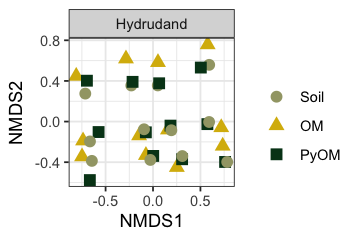

In [15]:
Soil = "Hawaii"
physeq = prune_samples(sample_data(ps.hell)$Soil_Trtmt==Soil,ps.hell)
ord = ordinate(physeq, "NMDS", "bray", k=2, trymax=500)
ord
df = as(sample_data(physeq), "data.frame")
d = phyloseq::distance(physeq, method = "bray")

d.adonis = adonis(d~sample_data(physeq)$Amdmt+
                  sample_data(physeq)$Day,
                  df)
d.adonis

options(repr.plot.width = 3, repr.plot.height = 2)

p = plot_ordination(physeq, ord, axes=c(1,2), type="samples", color="Amdmt",shape="Amdmt")
palette = c(wes_palette("Cavalcanti1"))
palette = palette[c(3,1,2)]
p = p + theme_bw()
p = p + scale_color_manual(values=palette)
p = p + geom_point(size=3)
p = p + guides(shape = guide_legend(title=""), color=guide_legend(title=""))
p = p + facet_wrap(~Soil_Name)
p

Run 0 stress 0.1511603 
Run 1 stress 0.1511603 
... Procrustes: rmse 3.6511e-06  max resid 7.338124e-06 
... Similar to previous best
Run 2 stress 0.1511603 
... New best solution
... Procrustes: rmse 1.338872e-06  max resid 4.44798e-06 
... Similar to previous best
Run 3 stress 0.1511603 
... Procrustes: rmse 1.262931e-06  max resid 4.314872e-06 
... Similar to previous best
Run 4 stress 0.1511603 
... Procrustes: rmse 5.691837e-06  max resid 1.372966e-05 
... Similar to previous best
Run 5 stress 0.1511603 
... Procrustes: rmse 1.086165e-06  max resid 2.792345e-06 
... Similar to previous best
Run 6 stress 0.1511603 
... Procrustes: rmse 4.135359e-06  max resid 1.135649e-05 
... Similar to previous best
Run 7 stress 0.1511603 
... Procrustes: rmse 9.971074e-07  max resid 2.448343e-06 
... Similar to previous best
Run 8 stress 0.1511603 
... Procrustes: rmse 1.665627e-06  max resid 4.427163e-06 
... Similar to previous best
Run 9 stress 0.1511603 
... Procrustes: rmse 3.219442e-06  ma


Call:
metaMDS(comm = veganifyOTU(physeq), distance = distance, k = 2,      trymax = 500) 

global Multidimensional Scaling using monoMDS

Data:     veganifyOTU(physeq) 
Distance: bray 

Dimensions: 2 
Stress:     0.1511603 
Stress type 1, weak ties
Two convergent solutions found after 20 tries
Scaling: centring, PC rotation, halfchange scaling 
Species: expanded scores based on ‘veganifyOTU(physeq)’ 



Call:
adonis(formula = d ~ sample_data(physeq)$Amdmt + sample_data(physeq)$Day,      data = df) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                          Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
sample_data(physeq)$Amdmt  2    0.9431 0.47156  2.7581 0.12437  0.001 ***
sample_data(physeq)$Day    2    1.3399 0.66995  3.9185 0.17670  0.001 ***
Residuals                 31    5.3000 0.17097         0.69893           
Total                     35    7.5831                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

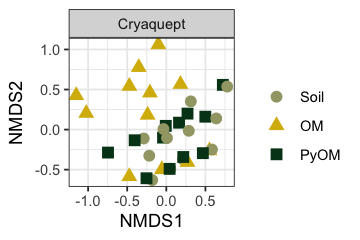

In [16]:
Soil = "Alaska"
physeq = prune_samples(sample_data(ps.hell)$Soil_Trtmt==Soil,ps.hell)
ord = ordinate(physeq, "NMDS", "bray", k=2, trymax=500)
ord
df = as(sample_data(physeq), "data.frame")
d = phyloseq::distance(physeq, method = "bray")

d.adonis = adonis(d~sample_data(physeq)$Amdmt+
                  sample_data(physeq)$Day,
                  df)
d.adonis

options(repr.plot.width = 3, repr.plot.height = 2)

p = plot_ordination(physeq, ord, axes=c(1,2), type="samples", color="Amdmt",shape="Amdmt")
palette = c(wes_palette("Cavalcanti1"))
palette = palette[c(3,1,2)]
p = p + theme_bw()
p = p + scale_color_manual(values=palette)
p = p + geom_point(size=3)
p = p + guides(shape = guide_legend(title=""), color=guide_legend(title=""))
p = p + facet_wrap(~Soil_Name)
p

Run 0 stress 0.1470494 
Run 1 stress 0.1640592 
Run 2 stress 0.1656161 
Run 3 stress 0.1812999 
Run 4 stress 0.1612913 
Run 5 stress 0.1470817 
... Procrustes: rmse 0.006716655  max resid 0.02789937 
Run 6 stress 0.1470809 
... Procrustes: rmse 0.006699761  max resid 0.02782284 
Run 7 stress 0.1470884 
... Procrustes: rmse 0.003253443  max resid 0.01396363 
Run 8 stress 0.154275 
Run 9 stress 0.1471234 
... Procrustes: rmse 0.007409312  max resid 0.02760182 
Run 10 stress 0.1876946 
Run 11 stress 0.2009413 
Run 12 stress 0.1470494 
... New best solution
... Procrustes: rmse 5.932138e-06  max resid 2.232765e-05 
... Similar to previous best
Run 13 stress 0.1967868 
Run 14 stress 0.1667519 
Run 15 stress 0.1471234 
... Procrustes: rmse 0.007410192  max resid 0.02760293 
Run 16 stress 0.171763 
Run 17 stress 0.2028444 
Run 18 stress 0.1470496 
... Procrustes: rmse 0.0001527786  max resid 0.0004778261 
... Similar to previous best
Run 19 stress 0.1781703 
Run 20 stress 0.1612913 
*** Solut


Call:
metaMDS(comm = veganifyOTU(physeq), distance = distance, k = 2,      trymax = 500) 

global Multidimensional Scaling using monoMDS

Data:     veganifyOTU(physeq) 
Distance: bray 

Dimensions: 2 
Stress:     0.1470494 
Stress type 1, weak ties
Two convergent solutions found after 20 tries
Scaling: centring, PC rotation, halfchange scaling 
Species: expanded scores based on ‘veganifyOTU(physeq)’ 



Call:
adonis(formula = d ~ sample_data(physeq)$Amdmt + sample_data(physeq)$Day,      data = df) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                          Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
sample_data(physeq)$Amdmt  2    0.8438 0.42188  5.4826 0.23716  0.001 ***
sample_data(physeq)$Day    2    0.5595 0.27977  3.6358 0.15727  0.001 ***
Residuals                 28    2.1545 0.07695         0.60558           
Total                     32    3.5578                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

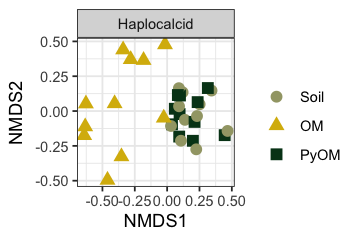

In [17]:
Soil = "Utah"
physeq = prune_samples(sample_data(ps.hell)$Soil_Trtmt==Soil,ps.hell)
ord = ordinate(physeq, "NMDS", "bray", k=2, trymax=500)
ord
df = as(sample_data(physeq), "data.frame")
d = phyloseq::distance(physeq, method = "bray")

d.adonis = adonis(d~sample_data(physeq)$Amdmt+
                  sample_data(physeq)$Day,
                  df)
d.adonis

options(repr.plot.width = 3, repr.plot.height = 2)

p = plot_ordination(physeq, ord, axes=c(1,2), type="samples", color="Amdmt",shape="Amdmt")
palette = c(wes_palette("Cavalcanti1"))
palette = palette[c(3,1,2)]
p = p + theme_bw()
p = p + scale_color_manual(values=palette)
p = p + geom_point(size=3)
p = p + guides(shape = guide_legend(title=""), color=guide_legend(title=""))
p = p + facet_wrap(~Soil_Name)
p

Run 0 stress 0.04770842 
Run 1 stress 0.3913098 
Run 2 stress 0.04784885 
... Procrustes: rmse 0.01111357  max resid 0.04047901 
Run 3 stress 0.08220318 
Run 4 stress 0.09750824 
Run 5 stress 0.09215758 
Run 6 stress 0.1018251 
Run 7 stress 0.04958712 
Run 8 stress 0.09898127 
Run 9 stress 0.05207244 
Run 10 stress 0.1032779 
Run 11 stress 0.04887769 
Run 12 stress 0.09536104 
Run 13 stress 0.04900504 
Run 14 stress 0.04770915 
... Procrustes: rmse 0.0002748464  max resid 0.001066637 
... Similar to previous best
Run 15 stress 0.05077823 
Run 16 stress 0.08120329 
Run 17 stress 0.09809327 
Run 18 stress 0.08708057 
Run 19 stress 0.0473948 
... New best solution
... Procrustes: rmse 0.01957079  max resid 0.08593806 
Run 20 stress 0.09897651 
Run 21 stress 0.08654662 
Run 22 stress 0.05130123 
Run 23 stress 0.04958682 
Run 24 stress 0.1016963 
Run 25 stress 0.09582776 
Run 26 stress 0.04749014 
... Procrustes: rmse 0.009441995  max resid 0.03934587 
Run 27 stress 0.04770985 
... Procrust


Call:
metaMDS(comm = veganifyOTU(physeq), distance = distance, k = 2,      trymax = 500) 

global Multidimensional Scaling using monoMDS

Data:     veganifyOTU(physeq) 
Distance: bray 

Dimensions: 2 
Stress:     0.04739299 
Stress type 1, weak ties
Two convergent solutions found after 29 tries
Scaling: centring, PC rotation, halfchange scaling 
Species: expanded scores based on ‘veganifyOTU(physeq)’ 



Call:
adonis(formula = d ~ sample_data(physeq)$Amdmt + sample_data(physeq)$Day,      data = df) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                          Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
sample_data(physeq)$Amdmt  2    1.4381 0.71907 11.9733 0.36461  0.001 ***
sample_data(physeq)$Day    2    0.6444 0.32221  5.3653 0.16338  0.001 ***
Residuals                 31    1.8617 0.06006         0.47201           
Total                     35    3.9443                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

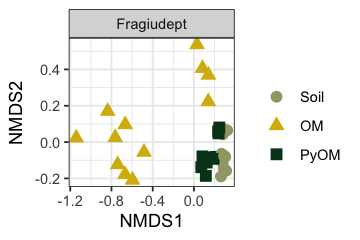

In [18]:
Soil = "New York"
physeq = prune_samples(sample_data(ps.hell)$Soil_Trtmt==Soil,ps.hell)
ord = ordinate(physeq, "NMDS", "bray", k=2, trymax=500)
ord
df = as(sample_data(physeq), "data.frame")
d = phyloseq::distance(physeq, method = "bray")

d.adonis = adonis(d~sample_data(physeq)$Amdmt+
                  sample_data(physeq)$Day,
                  df)
d.adonis

options(repr.plot.width = 3, repr.plot.height = 2)

p = plot_ordination(physeq, ord, axes=c(1,2), type="samples", color="Amdmt",shape="Amdmt")
palette = c(wes_palette("Cavalcanti1"))
palette = palette[c(3,1,2)]
p = p + theme_bw()
p = p + scale_color_manual(values=palette)
p = p + geom_point(size=3)
p = p + guides(shape = guide_legend(title=""), color=guide_legend(title=""))
p = p + facet_wrap(~Soil_Name)
p

Run 0 stress 0.1425452 
Run 1 stress 0.1423897 
... New best solution
... Procrustes: rmse 0.005324412  max resid 0.01762018 
Run 2 stress 0.1612562 
Run 3 stress 0.1527805 
Run 4 stress 0.1423897 
... Procrustes: rmse 1.832987e-05  max resid 5.194671e-05 
... Similar to previous best
Run 5 stress 0.1423898 
... Procrustes: rmse 4.153612e-05  max resid 0.0001122446 
... Similar to previous best
Run 6 stress 0.1423897 
... Procrustes: rmse 9.973312e-06  max resid 2.536385e-05 
... Similar to previous best
Run 7 stress 0.1893633 
Run 8 stress 0.1423897 
... New best solution
... Procrustes: rmse 5.933997e-06  max resid 2.028071e-05 
... Similar to previous best
Run 9 stress 0.1527814 
Run 10 stress 0.1423897 
... Procrustes: rmse 2.20356e-05  max resid 8.019864e-05 
... Similar to previous best
Run 11 stress 0.1912429 
Run 12 stress 0.1425453 
... Procrustes: rmse 0.00570061  max resid 0.01784479 
Run 13 stress 0.189016 
Run 14 stress 0.1527814 
Run 15 stress 0.1425453 
... Procrustes: r


Call:
metaMDS(comm = veganifyOTU(physeq), distance = distance, k = 2,      trymax = 500) 

global Multidimensional Scaling using monoMDS

Data:     veganifyOTU(physeq) 
Distance: bray 

Dimensions: 2 
Stress:     0.1423897 
Stress type 1, weak ties
Two convergent solutions found after 20 tries
Scaling: centring, PC rotation, halfchange scaling 
Species: expanded scores based on ‘veganifyOTU(physeq)’ 



Call:
adonis(formula = d ~ sample_data(physeq)$Amdmt + sample_data(physeq)$Day,      data = df) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                          Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
sample_data(physeq)$Amdmt  2    2.5193 1.25965  7.3456 0.30827  0.001 ***
sample_data(physeq)$Day    2    0.8514 0.42571  2.4825 0.10418  0.001 ***
Residuals                 28    4.8016 0.17148         0.58754           
Total                     32    8.1723                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

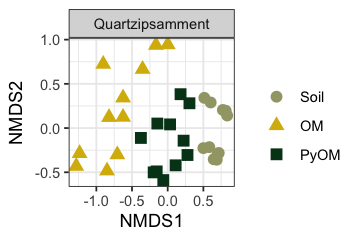

In [19]:
Soil = "Florida"
physeq = prune_samples(sample_data(ps.hell)$Soil_Trtmt==Soil,ps.hell)
ord = ordinate(physeq, "NMDS", "bray", k=2, trymax=500)
ord
df = as(sample_data(physeq), "data.frame")
d = phyloseq::distance(physeq, method = "bray")

d.adonis = adonis(d~sample_data(physeq)$Amdmt+
                  sample_data(physeq)$Day,
                  df)
d.adonis

options(repr.plot.width = 3, repr.plot.height = 2)

p = plot_ordination(physeq, ord, axes=c(1,2), type="samples", color="Amdmt",shape="Amdmt")
palette = c(wes_palette("Cavalcanti1"))
palette = palette[c(3,1,2)]
p = p + theme_bw()
p = p + scale_color_manual(values=palette)
p = p + geom_point(size=3)
p = p + guides(shape = guide_legend(title=""), color=guide_legend(title=""))
p = p + facet_wrap(~Soil_Name)
p